In [23]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [21]:
df= pd. read_csv('Team-3.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sl.no                   979 non-null    int64 
 1   Name                    979 non-null    object
 2   Age                     979 non-null    int64 
 3   Gender                  979 non-null    object
 4   Class                   979 non-null    int64 
 5   Study Hours (per week)  979 non-null    int64 
 6   Marks (out of 100)      979 non-null    int64 
 7   Attendance (%)          979 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 61.3+ KB


In [44]:
from sklearn.preprocessing import OrdinalEncoder
le=LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['Gender'])
df.head()

,Sl.no,Name,Age,Gender,Class,Study Hours (per week),Marks (out of 100),Attendance (%),gender_encoded,encode_Name,class-encoded
0,1,Eshal,15,M,10,12,77,86,1,8,0.0
1,2,Imran,16,F,10,14,76,88,0,12,0.0
2,3,Waleed,16,F,10,10,67,85,0,26,0.0
3,4,Tania,17,M,10,11,83,77,1,23,0.0
4,5,Nadia,17,M,10,14,79,80,1,17,0.0


In [94]:
# Create a new dataframe excluding 'Name' and 'Gender' columns
filter_df = df.drop(['Name', 'Gender', 'encode_Name','class-encoded','Class'], axis=1)

# Display the first few rows of the new dataframe
print("DataFrame after excluding Name and Gender columns:")
print(filter_df.head())

# Display basic information about the new dataframe
print("\nDataFrame Info:")
print(filter_df.info())


DataFrame after excluding Name and Gender columns:
   Sl.no  Age  ...  Attendance (%)  gender_encoded
0      1   15  ...              86               1
1      2   16  ...              88               0
2      3   16  ...              85               0
3      4   17  ...              77               1
4      5   17  ...              80               1

[5 rows x 6 columns]

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Sl.no                   979 non-null    int64
 1   Age                     979 non-null    int64
 2   Study Hours (per week)  979 non-null    int64
 3   Marks (out of 100)      979 non-null    int64
 4   Attendance (%)          979 non-null    int64
 5   gender_encoded          979 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 42.2 KB
None


In [163]:
z = 1.96  # For 95% confidence
sigma = 10  # Given population standard deviation
E = 3  # Margin of error for Team 3
N = len(filter_df)  # Population size
    
# Calculate initial sample size without correction
n0 = (z * sigma / E)**2
    
# Apply finite population correction
finit_pop_correction = n0 / (1 + (n0 - 1)/N)   
n = int(np.ceil(finit_pop_correction))

# Create bucket samples without replacement
bucket_size = 100  # Fixed bucket size
buckets = np.array_split(filter_df.sample(frac=0.30,replace=False, random_state=500), len(filter_df) // bucket_size)

# Print information about the buckets
print(f"Total number of buckets: {len(buckets)}")
print("\nSample sizes in each bucket:")
for i, bucket in enumerate(buckets):
    print(f"Bucket {i+1}: {len(bucket)} records")

# Example: Display first few rows of first bucket
print("\nFirst few rows of Bucket 1:")
print(buckets[0].head())
# Create sampling distribution
bucket_means = [bucket['Marks (out of 100)'].mean() for bucket in buckets]

Total number of buckets: 9

Sample sizes in each bucket:
Bucket 1: 33 records
Bucket 2: 33 records
Bucket 3: 33 records
Bucket 4: 33 records
Bucket 5: 33 records
Bucket 6: 33 records
Bucket 7: 32 records
Bucket 8: 32 records
Bucket 9: 32 records

First few rows of Bucket 1:
     Sl.no  Age  ...  Attendance (%)  gender_encoded
248    249   16  ...              90               1
940    941   16  ...              91               0
231    232   17  ...              90               1
717    718   16  ...              74               1
870    871   17  ...              83               1

[5 rows x 6 columns]


c:\Users\sxhil_25660\anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Mean of sampling distribution: 77.66
Standard deviation of sampling distribution: 1.65
Number of buckets: 9


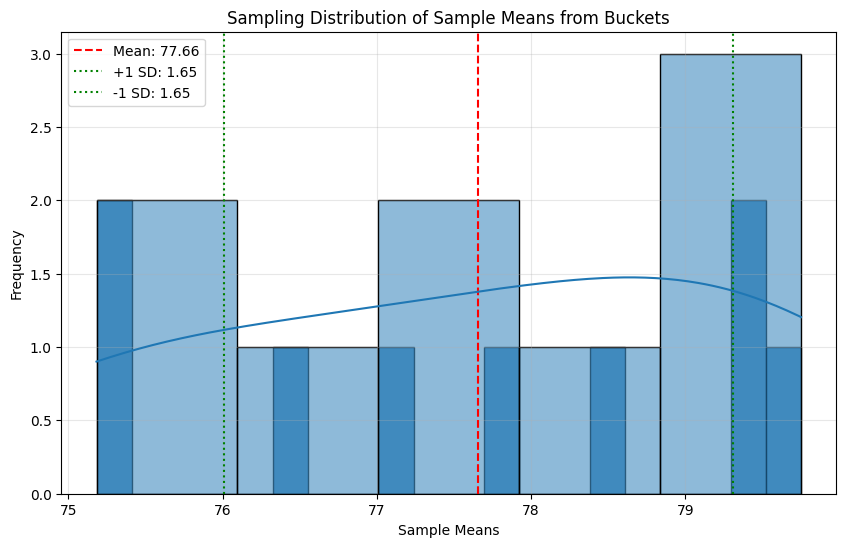

In [164]:
# Create sampling distribution
# Plot the sampling distribution
plt.figure(figsize=(10, 6))
s=plt.hist(bucket_means, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(bucket_means), color='red', linestyle='--', label=f'Mean: {np.mean(bucket_means):.2f}')
plt.axvline(x=np.mean(bucket_means) + np.std(bucket_means), color='green', linestyle=':', label=f'+1 SD: {np.std(bucket_means):.2f}')
plt.axvline(x=np.mean(bucket_means) - np.std(bucket_means), color='green', linestyle=':', label=f'-1 SD: {np.std(bucket_means):.2f}')
sns.histplot(bucket_means,kde=True)
# Add labels and title
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Sample Means from Buckets')
plt.legend()
plt.grid(True, alpha=0.3)

# Print statistics
print(f"Mean of sampling distribution: {np.mean(bucket_means):.2f}")
print(f"Standard deviation of sampling distribution: {np.std(bucket_means):.2f}")
print(f"Number of buckets: {len(buckets)}")



Correlations with Marks (out of 100):
Sl.no                    -0.148930
Age                       0.014015
Study Hours (per week)   -0.441912
Marks (out of 100)        1.000000
Attendance (%)            0.043013
gender_encoded           -0.291664
Name: Marks (out of 100), dtype: float64


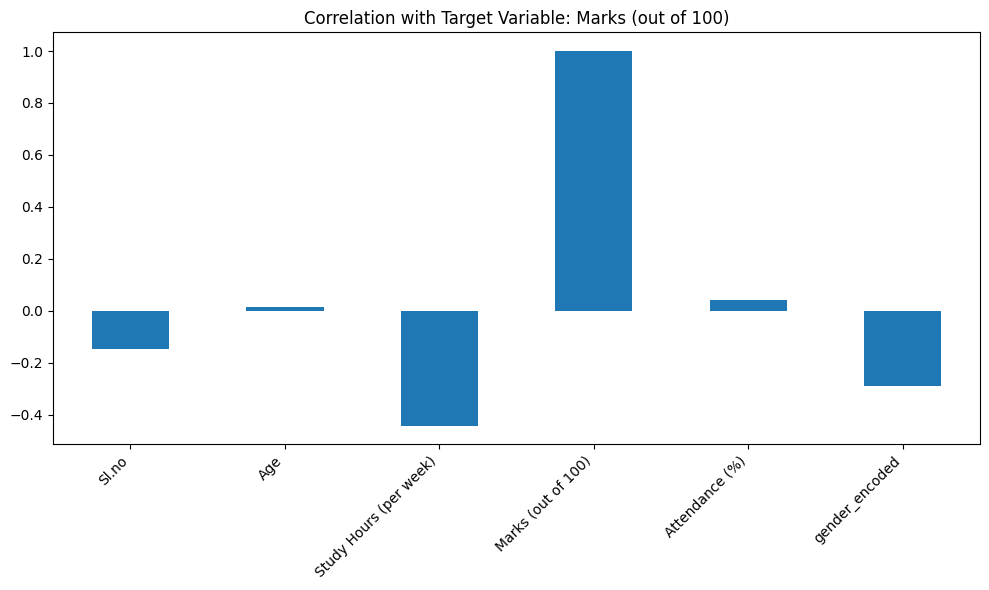

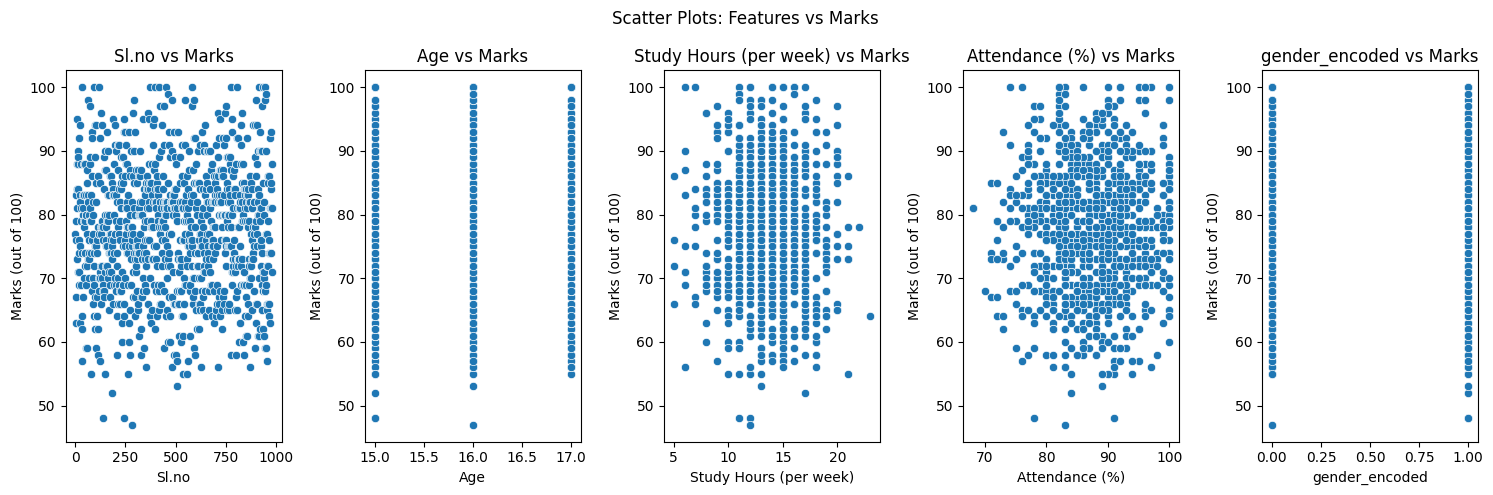

In [165]:
# Create correlation matrix
# Calculate correlations with Marks
correlations =bucket.corr('pearson')['Marks (out of 100)']

# Print correlations
print("\nCorrelations with Marks (out of 100):")
print(correlations)
# Create a bar plot
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Target Variable: Marks (out of 100)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create scatter plots for numeric variables
numeric_columns = filter_df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_columns if col != 'Marks (out of 100)']
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))
fig.suptitle('Scatter Plots: Features vs Marks')

for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=filter_df, x=col, y='Marks (out of 100)', ax=axes[i])
    axes[i].set_title(f'{col} vs Marks')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [166]:
from sklearn.model_selection import train_test_split
X = bucket.drop('Marks (out of 100)', axis=1)
y = bucket['Marks (out of 100)']
from sklearn.model_selection import KFold
kf = KFold(n_splits=9, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


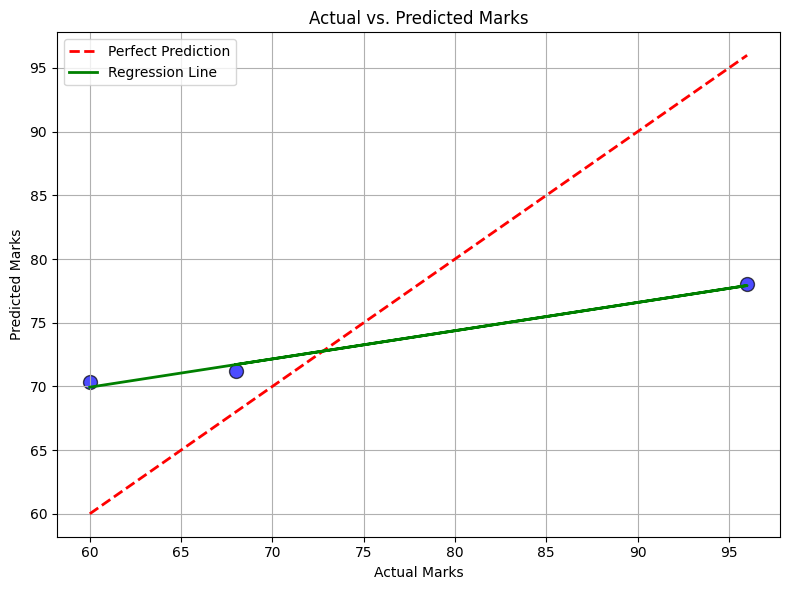


Model Performance Metrics:
R² Score: 0.3845
Mean Squared Error: 146.6279
Root Mean Squared Error: 12.1090
Mean Absolute Error: 10.4983

Feature Importance:
                  Feature  Coefficient
2  Study Hours (per week)    -2.837502
0                   Sl.no    -2.403929
4          gender_encoded    -1.287676
3          Attendance (%)    -0.883588
1                     Age    -0.659577


In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
X = bucket.drop('Marks (out of 100)', axis=1)
y = bucket['Marks (out of 100)']
X_train, X_test,y_train,y_test= train_test_split(X,y,train_size=0.4,shuffle=True)
from sklearn.model_selection import KFold
kf = KFold(n_splits=9, shuffle=True, random_state=0)
for train_index, test_index in kf.split(bucket):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Create the actual vs predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs. Predicted Marks')
plt.grid(True)

# Add regression line to show the actual trend
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linewidth=2, label='Regression Line')
plt.legend()
plt.tight_layout()
plt.show()

# Print model performance metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("\nModel Performance Metrics:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))

Number of buckets: 9

Hypothesis Testing Results:
One-way ANOVA Test
H0: All buckets have the same mean marks
F-statistic: 1.1598
P-value: 0.3236
Conclusion: Fail to reject H0


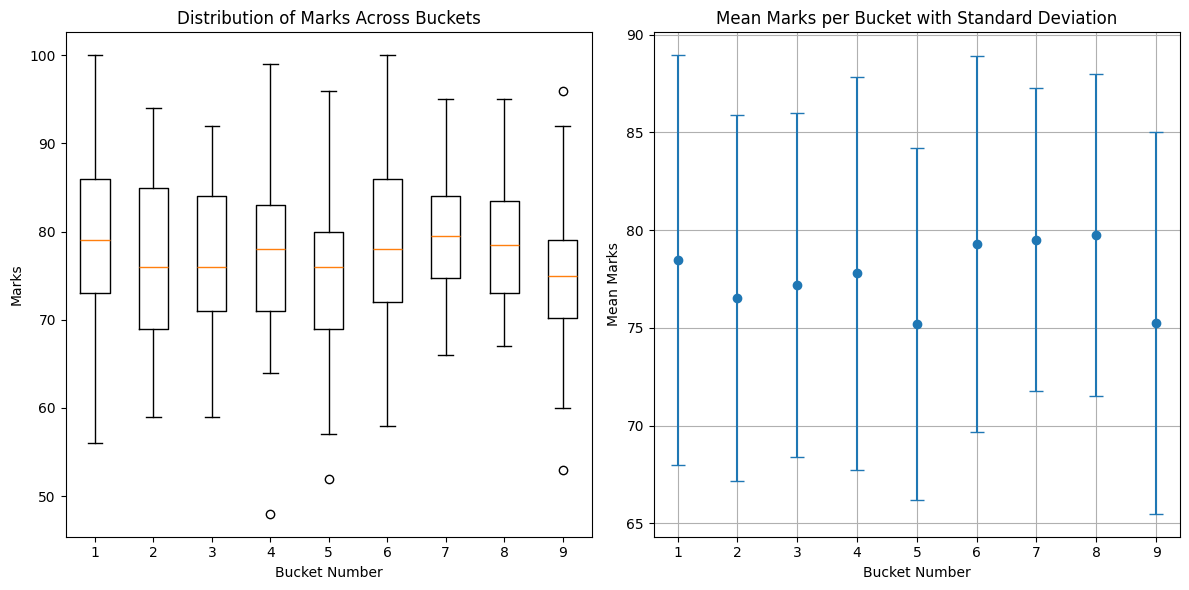


Bucket Statistics:

Bucket 1:
Size: 33
Mean Marks: 78.45
Std Dev: 10.50

Bucket 2:
Size: 33
Mean Marks: 76.52
Std Dev: 9.36

Bucket 3:
Size: 33
Mean Marks: 77.18
Std Dev: 8.80

Bucket 4:
Size: 33
Mean Marks: 77.79
Std Dev: 10.05

Bucket 5:
Size: 33
Mean Marks: 75.18
Std Dev: 9.01

Bucket 6:
Size: 33
Mean Marks: 79.30
Std Dev: 9.61

Bucket 7:
Size: 32
Mean Marks: 79.50
Std Dev: 7.75

Bucket 8:
Size: 32
Mean Marks: 79.75
Std Dev: 8.22

Bucket 9:
Size: 32
Mean Marks: 75.25
Std Dev: 9.76

Normality Test Results:
Bucket 1 p-value: 0.7436
Distribution: Normal
Bucket 2 p-value: 0.1021
Distribution: Normal
Bucket 3 p-value: 0.4976
Distribution: Normal
Bucket 4 p-value: 0.1628
Distribution: Normal
Bucket 5 p-value: 0.3770
Distribution: Normal
Bucket 6 p-value: 0.9377
Distribution: Normal
Bucket 7 p-value: 0.6503
Distribution: Normal
Bucket 8 p-value: 0.2991
Distribution: Normal
Bucket 9 p-value: 0.8949
Distribution: Normal

Levene's Test for Homogeneity of Variances:
P-value: 0.8922
Conclusion

" Additional visualization: Density plots for each bucket\nplt.figure(figsize=(10, 6))\nfor i, bucket in enumerate(buckets):\n    sns.kdeplot(data=bucket['Marks (out of 100)'], label=f'Bucket {i+1}')\nplt.title('Density Distribution of Marks Across Buckets')\nplt.xlabel('Marks')\nplt.ylabel('Density')\nplt.legend()\nplt.grid(True)\nplt.show()"

In [168]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# Perform statistical analysis on buckets
print(f"Number of buckets: {len(buckets)}")

# Calculate mean marks for each bucket
bucket_means = [bucket['Marks (out of 100)'].mean() for bucket in buckets]
bucket_stds = [bucket['Marks (out of 100)'].std() for bucket in buckets]

# Perform one-way ANOVA to test if buckets are significantly different
bucket_marks = [bucket['Marks (out of 100)'] for bucket in buckets]
f_stat, p_value = stats.f_oneway(*bucket_marks)

print("\nHypothesis Testing Results:")
print("One-way ANOVA Test")
print(f"H0: All buckets have the same mean marks")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("Conclusion:", "Reject H0" if p_value < 0.05 else "Fail to reject H0")

# Visualize bucket distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([bucket['Marks (out of 100)'] for bucket in buckets])
plt.title('Distribution of Marks Across Buckets')
plt.xlabel('Bucket Number')
plt.ylabel('Marks')

# Plot mean marks with confidence intervals
plt.subplot(1, 2, 2)
bucket_numbers = range(1, len(buckets) + 1)
plt.errorbar(bucket_numbers, bucket_means, yerr=bucket_stds, fmt='o', capsize=5)
plt.title('Mean Marks per Bucket with Standard Deviation')
plt.xlabel('Bucket Number')
plt.ylabel('Mean Marks')
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical summary of buckets
print("\nBucket Statistics:")
for i, bucket in enumerate(buckets):
    print(f"\nBucket {i+1}:")
    print(f"Size: {len(bucket)}")
    print(f"Mean Marks: {bucket_means[i]:.2f}")
    print(f"Std Dev: {bucket_stds[i]:.2f}")
    
# Test for normality in each bucket
print("\nNormality Test Results:")
for i, bucket in enumerate(buckets):
    _, normality_p_value = stats.normaltest(bucket['Marks (out of 100)'])
    print(f"Bucket {i+1} p-value: {normality_p_value:.4f}")
    print("Distribution:", "Normal" if normality_p_value > 0.05 else "Non-normal")

# Compare bucket variances (Levene's test)
_, levene_p_value = stats.levene(*bucket_marks)
print("\nLevene's Test for Homogeneity of Variances:")
print(f"P-value: {levene_p_value:.4f}")
print("Conclusion:", "Equal variances" if levene_p_value > 0.05 else "Unequal variances")

''' Additional visualization: Density plots for each bucket
plt.figure(figsize=(10, 6))
for i, bucket in enumerate(buckets):
    sns.kdeplot(data=bucket['Marks (out of 100)'], label=f'Bucket {i+1}')
plt.title('Density Distribution of Marks Across Buckets')
plt.xlabel('Marks')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()'''